<div align ="right">Thomas Jefferson University <b>COMP 104</b>: Intro to Big Data</div>

# Chi-square analysis and other tests of categorical data

Sometimes data naturally falls into discrete categories. In medicine, a subject may have a particular diagnosis or not. The subject of a procedure may be dead, or alive. In evolutionary biology or genetics a subject may possess a particular trait, or not possess it. In behavior a subject may mate successfully, or not. In engineering a structure might fail or not fail. All of these things represent natural categories. It is a reasonable statistical question to ask - what is the likelihood of observing a particular pattern of distribution across categories. Furthermore, can we attach a probability - in the form of a p-value - to our observation. 

Let's take the example of flipping a coin. We know that the probability of getting either heads or tails is 0.5. We flip a coin 1000 times and get 530 heads. Seems pretty far away from what we expected? But can we test that?





[480, 507, 486, 499, 492, 491, 497, 501, 482, 518]


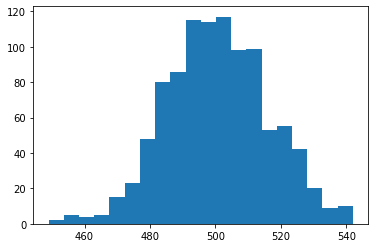

In [3]:
import random as rand
import matplotlib.pyplot as plt

outcomes = ['heads','tails']

results = []                                   #create an empty list for the data

replicates = 1000                              # of replicates of flipping a coin numflip times 
numflips = 1000                                # of flips  

for i in range(replicates):
        counter = 0                            # counter for heads
        for j in range (numflips):
            flip = rand.choice(outcomes)       # each time you pick a coin, randomly pick a value from outcomes
            if flip == 'heads': 
                counter += 1                   # iterate counter each time you get heads
        results.append(counter)    

print(results[:10])                            #print first 10 items

histogram = plt.hist(results, bins = 20)
plt.show(histogram)
            
            
            
    
    

Now run the code below to count up and visualize how many of our data points exceed our value of 540. 

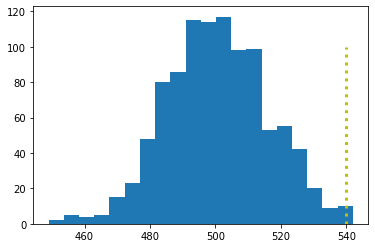

number of observations ≥ 540: 7
probability of exceeding 540: 0.007


In [4]:
exceeds = 0
for i in results:
    if i >= 540:
        exceeds += 1
        
histogram = plt.hist(results, bins = 20)
plt.plot([540,540],[0,100],':y', lw=3)
plt.show(histogram)


prob = exceeds/replicates

print('number of observations ≥ 540: ' + str(exceeds))
print('probability of exceeding 540: ' + str(prob))


        


## One-way Chi-square test

So this is what a chi-square test does, and in fact, we have just done the first iteration of a chi-square analysis - we have asked if given a certain set of probabilities whether what we observe is likely or not. 

But it turns out there's a great built in way to do this. 

In [5]:
from scipy import stats

X = stats.chisquare([540,460])
print(X)
print()
print('Chi-square statistic = ' + str(X.statistic))
print('p-value = ' + str(round(X.pvalue,4)))

Power_divergenceResult(statistic=6.4, pvalue=0.01141203638600166)

Chi-square statistic = 6.4
p-value = 0.0114


So we can see that our simulation gave us the same result as the statistical test. Just like with our t-test, the test returns two things, the value of the test statistic - in this case the chi-square statistic - and a p-value. Just like a t-test there exist <a href = 'https://www.statology.org/chi-square-distribution-table/'>statistical tables for the chi-square distribution</a> that can be used to determine the p-value. 

Degrees of freedom for a chi-square test are calculated differently. Because we are comparing proportions, we can't say that number of observations represents independent values. We really have two values: number of heads, and number of tails. And if we know one of those, we know the other! That means that we only have one truly independent observation, and thus one degree of freedom. In the one-way chi-square, the degrees of freedom will therefor always be r-1 where r is the number of outcomes or categories in the data.   

The equation for a Chi-square test statistic is actually very simple:
<img src="images/Chi_sq_formula.jpg" alt="Formula for the Chi-squared test statistic" width="500"/>

Where O<sub>i</sub> is the <i>observed</i> value for each category and E<sub>i</sub> is the <i>expected</i> value for each category. To show what we mean by observed and expected values, let's make a quick table:

|outcome|observed|expected|
|---:| :---: |:---:|
|heads| 540 |500|
|tails|460|500|

In this case, since we are flipping a coin we know that our expected distribution should be 50:50. Using the equation above, write a chunk of code that calculates the X<sup>2</sup> statistic for our example data manually (without calling the `chisquare` function):

In [10]:
# Calculate the chi-square value for flipping a coin and getting 540 head and 460 tails
## without using the chisquare function
import numpy as np
import pandas as pd
import scipy.stats as stats

chi_squared_stat1 = ((540-500)**2/500)

chi_squared_stat2 = ((460-500)**2/500)

chi_squared_stat = ((chi_squared_stat1)+(chi_squared_stat2))
print('Chi Square ='+str(chi_squared_stat))
  


Chi Square =6.4


# Chi-square contingency test

The most common use of a Chi-square test is the Chi-square contingency test. A contingency table shows the distribution of two categorical variables simultaneously: 


|&nbsp;|Trichromat|Dichromat|
|---:| :---: |:---:|
|Male| 687 |77|
|Female|723|8|


In this case we have the distribution of trichromat and dichromat (color-blind) individuals in a population, as well as the distribution of males and females in the population. We organize things into a contingency table to see if one variable is <i>contingent</i>, or in other words <i>depends on</i> the other. In this case we see that the occurrence of color-blindness depends on sex of the subject, which we all knew already.

Just as with the means comparisons, in our one-way chi-square we started with an example where we new the true value (in this case the 0.5 probability of flipping heads). Usually for real-world questions, however, we don't know what the population level probability is at the outset of the analysis. Take a look at the table below which shows the results of a contingency table of data showing survival rates for two different medical treatments. 


|&nbsp;|Survived|Deceased|
|---:| :---: |:---:|
|Treatment A| 16 |283|
|Treatment B|43|862|

Overall, we can just glance at this data and see a few things: 
* The survival rates are low!
* Of the individuals in our study, many more received treatment B than treatment A 
* The survival rate for treatment B is slightly lower than for the less common treatment B
A Chi-squared test will allow us to answer the following question: Is it likely that the differences between the groups are just the result of sampling, or does it appear that survival is contingent upon the treatment received?

We can actually  calculate a Chi-square value using the same equation as above. So how do we get our expected values? 

The first thing we can do is this: Calculate the overall frequencies, using the whole data set, for each of the two categorical variables. 

Probability  Survived = (16+43) / 1204 = 0.049, Probability Deceased = 0.951
Probability  A = (16 + 283) / 1204 = 0.248, Probability B = 0.752

Now if we combine those values we can get this table of expected combined probabilities:

|&nbsp;|Survived (0.049)|Deceased (0.951)|
|---:| :---: |:---:|
|Treatment A (0.248)| 0.012 |0.236|
|Treatment B(0.752)|0.037|0.715|

Just like in a punnett square, these values should sum to one, as they represent the entire set of possibilities. Then if we multiply those values by the total number of observations, we get a table of expected values. This table represents our null hypothesis that the two categories are not contingent on one another. 


|&nbsp;|Survived_exp|Deceased_exp|
|---:| :---: |:---:|
|Treatment A_exp| 14.4 |284.1|
|Treatment B_exp|44.5|860.9|

These values can now be used in our original equation, such that each cell in our original data is the O<sub>i</sub>  value and each cell in the table of expected values is the E<sub>i</sub> value. 

In the Chi-square contingency test the degrees of freedom are calculated similarly to the one-way, except that we multiply the 'rows and columns' of data (r-1) * (c-1) where r and c are the number of categories in each variable. In this case, we still have df = 1. 

Running a chi-square contingency analysis is slightly more complicated than running the one-way test, in that we have to hand the data off to the function as an array. 

In [11]:
import numpy as np

data = np.array([[16,283],[43,862]])
X = stats.chi2_contingency(data)
# X = stats.chi2_contingency([[16,283],[43,862]])   # this works too with one less step, but see below

print(X)

(0.06865951087930078, 0.7932986223212845, 1, array([[ 14.65199336, 284.34800664],
       [ 44.34800664, 860.65199336]]))


Well this is a bit of a mess. 

If we consult the <a href = 'https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html'>documentation for the chi2_contingency function</a> we see that the output is organized in the following way - the chi-square test statistic, the p value, the degrees of freedom, and finally an array showing the expected values. The values are a bit different from what we calculated by hand due to rounding, but this is a very nice output to help in interpreting our data. 

So let's approach this in a slightly more labor intensive way that will let us interpret the results of this test better. In the code below we separate these individual outputs into variables, and sort the data out into nicer looking tables with labels using pandas: 

In [12]:
import pandas as pd

data_df = pd.DataFrame(data, index = ["   A","   B"], columns = ["Survived","Deceased"])

chi2, p, dof, expected = stats.chi2_contingency(data_df)    # Notice this technique, when a function returns
                                                            ## a number of values, as is often the case with
                                                            ## statistical functions, we can assign multiple
                                                            ## variables at once by separating them with
                                                            ## commas on the left-hand side of the equal sign.
                                                            ## But we have to be sure of the order!    
print('Data')
print()
print(data_df)
print()
print('Chi-square results')
print()
print('   chi-square = '+ str(round(chi2,4)))
print('   p value = '+ str(round(p,4)))
print('   degrees of freedom = '+ str(dof))
print('   expected values:')
print()
print(pd.DataFrame(expected, index = ["   A","   B"], columns = ["Survived","Deceased"])) # this will look nicer

Data

      Survived  Deceased
   A        16       283
   B        43       862

Chi-square results

   chi-square = 0.0687
   p value = 0.7933
   degrees of freedom = 1
   expected values:

       Survived    Deceased
   A  14.651993  284.348007
   B  44.348007  860.651993


Alright! That's much better! So how would you interpret the hypothesis test we just conducted? What was our hypothesis? What do our results say about our hypothesis? 

* The p-value is larger than 0.5 therefore the null hypothesis is accepted and there is no significant difference between the groups
* 
* 


# Chi-square contingency test - multiple categories

Chi-square tests are not restricted to 2x2 contingency tables. Conduct a chi-square test using the dataset below on observations of the location of animal nesting sites. Organize the data into a pandas dataframe and report and interpret the results of the chi-square test. 

|&nbsp;|Tree|Nestbox|Human_structure|
|---:| :---: |:---:|:---:|
|Gray Squirrel| 552 | 25|53|
|Flying Squirrel|72|23|24|
|Raccoon|43|5|10|



In [22]:
# Write the code here:
import numpy as np
data= np.array([[552,25,53],[72,23,24],[43,5,10]])
X = stats.chi2_contingency(data)

data_df = pd.DataFrame(data, index = ["   Gray Squirrel","   Flying Squirrel","   Raccoon"], columns = ["Tree","Nestbox","Human_structure"])
chi2, p, dof, expected = stats.chi2_contingency(data_df)

print('Data')
print(data_df)
print('Chi-square results')
print(' chi-square = '+str(round(chi2,4)))
print(' p value ='+str(round(p,4)))
print('degrees of freedom ='+str(dof))
print('expected values:')
print(pd.DataFrame(expected, index = ["   Gray Squirrel","   Flying Squirrel","   Raccoon"], columns = ["Tree","Nestbox","Human_structure"]))



Data
                    Tree  Nestbox  Human_structure
   Gray Squirrel     552       25               53
   Flying Squirrel    72       23               24
   Raccoon            43        5               10
Chi-square results
 chi-square = 61.0573
 p value =0.0
degrees of freedom =4
expected values:
                          Tree    Nestbox  Human_structure
   Gray Squirrel    520.706320  41.375465        67.918216
   Flying Squirrel   98.355638   7.815366        12.828996
   Raccoon           47.938042   3.809170         6.252788


Write you interpretation of the results here. How can you use the 'expected' data to interpret the result? Which animal is most different from the others? What happens if you remove that organism from the analysis?
* The pvalue is practically zero, meaning we reject the null hypothesis and the difference between groups is very significant. The flying squirrel is most different because irene crunched the numbers and showed us. When the flying squirrel was taken out, the chi square went way down to around 8
* 
* 


# Chi-square contingency test - multiple dimensions

We can run a chi-square test in multiple dimensions, but the data gets harder to interpret Take a look at the data below on student academic performance. DFW are students who do not pass a class. The first table is for women:

|&nbsp;|DFW|Pass|
|---:| :---: |:---:|
|Female non-athlete| 20 | 80|
|Female athlete|6|94|

The second for men

|&nbsp;|DFW|Pass|
|---:| :---: |:---:|
|Male non-athlete| 21 | 79|
|Male athlete|19|81|

We could analyze this data three different ways and get three different results. We could run a chi-square analysis on each table individually. We could combine the data so that there are four categories instead of two:

|&nbsp;|DFW|Pass|
|---:| :---: |:---:|
|Female non-athlete| 20 | 80|
|Female athlete|6|94|
|Male non-athlete| 21 | 79|
|Male athlete|19|81|

Or finally, and we can't represent this as a table, we could combine the data into a single 3 dimensional array of 2x2x2 that would allow us to treat gender/academic performance/ athlete status as three totally separate categories. 

In [23]:

#individually
print(stats.chi2_contingency([[20,80],[6,94]]))                         #female data
print()
print(stats.chi2_contingency([[19,81],[21,79]]))                        #male data
print()
#as four categories of student
print(stats.chi2_contingency([[20,80],[6,94],[19,81],[21,79]]))         #males and females as individual rows
print()
#as 3 unique factors
print(stats.chi2_contingency([[[20,80],[6,94]],[[19,81],[21,79]]]))     # males and females additional category




(7.471264367816092, 0.006269150834046231, 1, array([[13., 87.],
       [13., 87.]]))

(0.03125, 0.8596837951986661, 1, array([[20., 80.],
       [20., 80.]]))

(10.81473416802758, 0.012771043768860704, 3, array([[16.5, 83.5],
       [16.5, 83.5],
       [16.5, 83.5],
       [16.5, 83.5]]))

(10.81473416802758, 0.02872697653358403, 4, array([[[16.5, 83.5],
        [16.5, 83.5]],

       [[16.5, 83.5],
        [16.5, 83.5]]]))


Explain the code difference between the second and third option (it's subtle but important). Explain the values you obtain from running the code block above. Why did the second and third options give us the same X<sup>2</sup> value but different p-values???
* The code difference appears to be the extra set of parathesis that adds another row. The values we seem to get chi square value, pvalue, and degree of freedom. The second and third options may have given us the same x squared but different pvalues because the degrees of freedom changes with the extra row. 
* 
* 



![Alt text that will appear on mouseover](images/TJU_logo_image.png "TJU logo image")